In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as  pd
import altair as alt
import pickle
import utils

In [ ]:
# from pathlib import Path
# Create output directory for figures
# Path("figures/synthetic_dataset").mkdir(parents=True, exist_ok=True)

# BC Approximation Scalability (Synthetic Benchmark)


In [4]:
G = pickle.load(open('../graph_construction/combined_graphs_output/synthetic_benchmark_bipartite/bipartite/bipartite.graph', 'rb'))

# Dictionary of every cell value to whether it is a homograph or not in ground truth
cell_value_to_class_dict = pickle.load(open('ground_truth/synthetic_example_groundtruth_dict.pickle', 'rb'))

# Get the list of homographs and unambiguous_values 
homographs = []
unambiguous_values = []
for cell_val in cell_value_to_class_dict:
    if G.degree[cell_val] > 1:
        if cell_value_to_class_dict[cell_val] == 'homograph':
            homographs.append(cell_val)
        else:
            unambiguous_values.append(cell_val)

print("There are:", len(homographs), "homographs")
print("There are:", len(unambiguous_values), "unambiguous values")
nodes_to_evaluate = homographs + unambiguous_values
print(len(nodes_to_evaluate), 'words in total to evaluate')


There are: 55 homographs
There are: 1175 unambiguous values
1230 words in total to evaluate


In [6]:
# Load dataframe and truncate it for only the `nodes_to_evaluate`
df = pickle.load(open('output/synthetic_example_bipartite/graph_stats_approximate_benchmark.pickle', 'rb'))
df = df.loc[df['node'].isin(nodes_to_evaluate)]

# Get appropriate labels for the is_homograph column
is_homograph_list = []
for node in df['node'].values:
    is_homograph_list.append(cell_value_to_class_dict[node])
df['is_homograph'] = is_homograph_list
df

,node,node_type,betweenness_centrality,geisberger_1,geisberger_2,geisberger_3,geisberger_4,geisberger_5,geisberger_6,geisberger_7,...,geisberger_242,geisberger_243,geisberger_244,geisberger_245,geisberger_246,geisberger_247,geisberger_248,geisberger_249,geisberger_250,is_homograph
3,France,cell,2.495051e-07,0.000000,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,...,1.824003e-07,2.879326e-08,2.624752e-08,4.196784e-07,3.529994e-07,2.785298e-07,8.801443e-08,5.999057e-07,8.153532e-08,unambiguous value
5,Lesotho,cell,1.169126e-08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,4.119212e-09,0.000000e+00,3.706355e-08,0.000000e+00,1.708461e-08,8.516786e-09,4.637418e-08,0.000000e+00,unambiguous value
7,China,cell,2.495051e-07,0.000000,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,...,1.824003e-07,2.879326e-08,2.624752e-08,4.196784e-07,3.529994e-07,2.785298e-07,8.801443e-08,5.999057e-07,8.153532e-08,unambiguous value
10,Sweden,cell,2.495051e-07,0.000000,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,...,1.824003e-07,2.879326e-08,2.624752e-08,4.196784e-07,3.529994e-07,2.785298e-07,8.801443e-08,5.999057e-07,8.153532e-08,unambiguous value
11,Sydney,cell,9.810583e-03,0.065558,0.0,0.012733,0.006803,0.013469,0.023175,0.006961,...,8.641228e-03,9.547925e-03,9.339217e-03,8.733622e-03,1.023739e-02,1.081714e-02,9.847167e-03,8.985493e-03,1.004068e-02,homograph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,MM,cell,3.259492e-08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.557084e-08,5.534309e-08,5.511720e-08,3.871416e-08,7.520956e-08,1.920097e-08,0.000000e+00,7.430704e-08,unambiguous value
15392,AI,cell,3.259492e-08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.557084e-08,5.534309e-08,5.511720e-08,3.871416e-08,7.520956e-08,1.920097e-08,0.000000e+00,7.430704e-08,unambiguous value
15533,CG,cell,3.259492e-08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.557084e-08,5.534309e-08,5.511720e-08,3.871416e-08,7.520956e-08,1.920097e-08,0.000000e+00,7.430704e-08,unambiguous value
15547,SV,cell,3.259492e-08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.557084e-08,5.534309e-08,5.511720e-08,3.871416e-08,7.520956e-08,1.920097e-08,0.000000e+00,7.430704e-08,unambiguous value


In [30]:
sample_sizes = range(1, 250, 1)
precision_list = []
precision_at = 55
for sample_size in sample_sizes:
    count_dict = df.nlargest(precision_at, 'geisberger_'+str(sample_size))['is_homograph'].value_counts()
    if 'homograph' in count_dict:
        precision = count_dict['homograph'] / precision_at
    else:
        precision = 0
    precision_list.append(precision)

In [33]:
df_runtimes = pickle.load(open('output/synthetic_example_bipartite/approximate_benchmark_runtimes.pickle', 'rb'))

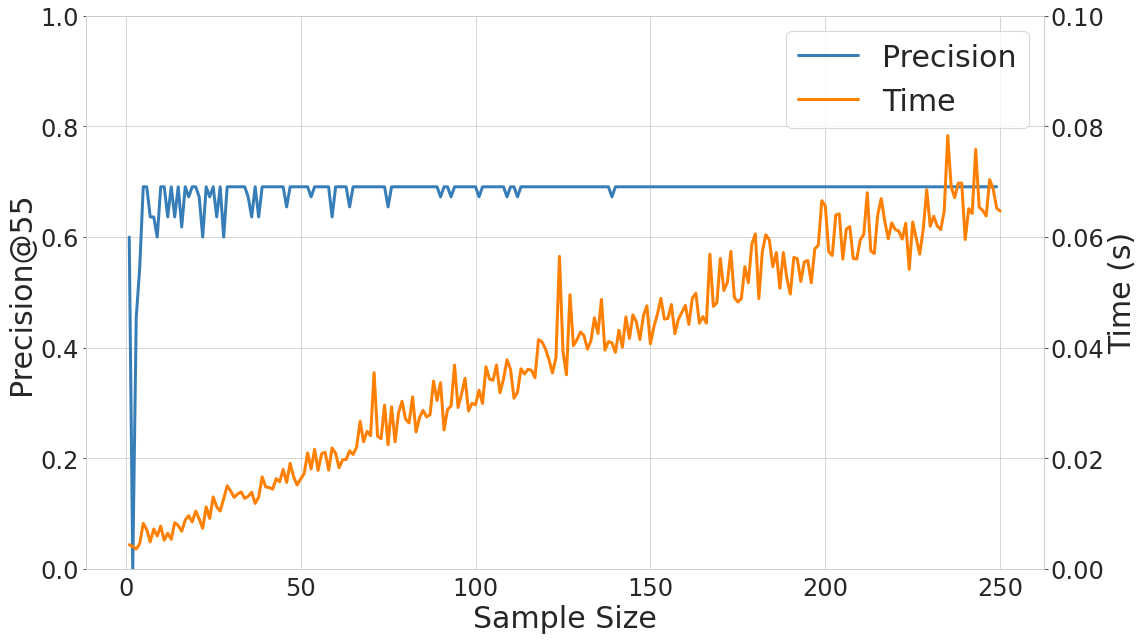

In [34]:
plot_df = pd.DataFrame()
plot_df['Precision'] = precision_list
plot_df['Sample Size'] = sample_sizes

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ln1 = ax1.plot(sample_sizes, precision_list, color='#377eb8', label='Precision', linewidth=3)
ln2 = ax2.plot(df_runtimes['sample_size'], df_runtimes['geisberger2008'], color='#ff7f00', label='Time', linewidth=3)
ax2.grid(None)

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=30)

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 0.1)
ax1.set_xlabel('Sample Size', fontsize=30)
ax1.set_ylabel('Precision@55', fontsize=30)
ax2.set_ylabel('Time (s)', fontsize=30)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

fig.set_size_inches(16, 9)
fig.tight_layout()



# BC Approximation Scalability (TUS Benchmark)

In [35]:
G = pickle.load(open('../graph_construction/combined_graphs_output/TUS/bipartite/bipartite.graph', 'rb'))
print('Number of nodes', G.number_of_nodes())
print('Number of edges', G.number_of_edges())

# Get the list of homographs and unambiguous_values 
homographs = []
unambiguous_values = []
nodes_to_evaluate = []
for node in G:
    if G.degree[node] > 1 and G.nodes[node]['type'] == 'cell':
        nodes_to_evaluate.append(node)

print(len(nodes_to_evaluate), 'words in total to evaluate')

Number of nodes 200258
Number of edges 4150563
185941 words in total to evaluate


In [36]:
df = pickle.load(open('output/TUS/graph_stats_approximate_benchmark.pickle', 'rb'))
df = df.loc[df['node'].isin(nodes_to_evaluate)]
df


,node,node_type,approximate_betweenness_centrality,is_homograph,has_missing_key,geisberger_100,geisberger_200,geisberger_300,geisberger_400,geisberger_500,...,geisberger_4200,geisberger_4300,geisberger_4400,geisberger_4500,geisberger_4600,geisberger_4700,geisberger_4800,geisberger_4900,geisberger_5000,kadabra
7,OGM Asia Pacific,cell,3.443295e-08,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.956548e-08,2.887791e-08,2.822159e-08,1.729071e-08,7.090396e-08,0.000000e+00,2.586979e-08,1.592236e-08,1.556164e-08,0.000000
8,Asia,cell,1.471620e-04,True,False,0.000116,0.000125,0.000108,0.000109,0.000186,...,1.366715e-04,1.387530e-04,1.245408e-04,1.287260e-04,1.145165e-04,1.472573e-04,1.172127e-04,1.415833e-04,1.208426e-04,0.000587
9,Bangladesh,cell,2.309374e-05,True,False,0.000077,0.000024,0.000048,0.000020,0.000023,...,2.635282e-05,2.750461e-05,2.685033e-05,2.622966e-05,2.784215e-05,2.376454e-05,2.246077e-05,2.321563e-05,2.599633e-05,0.000000
10,OAD Asia Programming,cell,3.897592e-05,True,False,0.000034,0.000036,0.000031,0.000032,0.000036,...,3.827244e-05,3.890742e-05,3.394991e-05,3.318168e-05,3.783604e-05,3.761584e-05,3.845316e-05,3.358924e-05,3.754700e-05,0.000147
11,Individual,cell,1.310829e-08,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.658127e-08,2.383325e-08,2.330362e-08,1.139851e-08,1.115599e-08,0.000000e+00,2.140128e-08,2.097326e-08,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200196,MRS,cell,0.000000e+00,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
200197,BEV,cell,0.000000e+00,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
200198,BUR,cell,0.000000e+00,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
200199,OTP,cell,0.000000e+00,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [38]:
num_homographs = df['is_homograph'].value_counts()[True]
print('There are', num_homographs, 'homographs based on the ground truth')

There are 26539 homographs based on the ground truth


In [51]:
sample_sizes = range(100, 5000 + 1, 100)
precision_list = []
precision_at = num_homographs
for sample_size in sample_sizes:
    precision = df.nlargest(precision_at, 'geisberger_'+str(sample_size))['is_homograph'].value_counts()[True] / precision_at
    precision_list.append(precision)

In [52]:
df_runtimes = pickle.load(open('output/TUS/approximate_benchmark_runtimes.pickle', 'rb'))

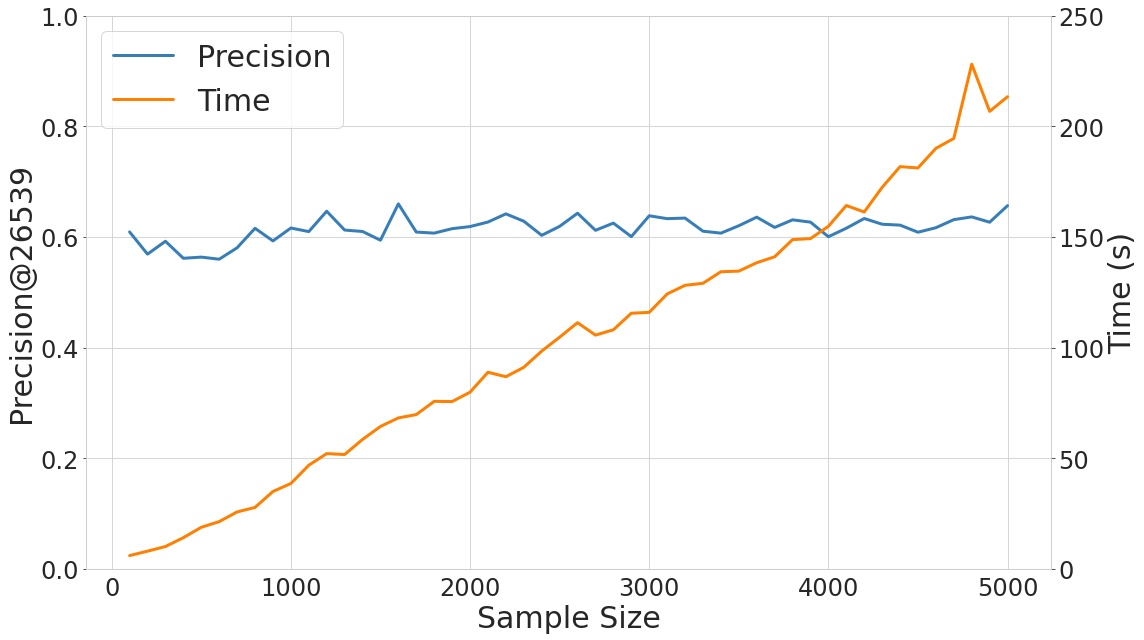

In [53]:
plot_df = pd.DataFrame()
plot_df['Precision'] = precision_list
plot_df['Sample Size'] = sample_sizes

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ln1 = ax1.plot(sample_sizes, precision_list, color='#377eb8', label='Precision', linewidth=3)
ln2 = ax2.plot(df_runtimes['sample_size'], df_runtimes['geisberger2008'], color='#ff7f00', label='Time', linewidth=3)
ax2.grid(None)

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2, fontsize=30)

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 250)
ax1.set_xlabel('Sample Size', fontsize=30)
ax1.set_ylabel('Precision@26539', fontsize=30)
ax2.set_ylabel('Time (s)', fontsize=30)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

fig.set_size_inches(16, 9)
fig.tight_layout()

